# Getting Started

In [1]:
#import required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading data files
store_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/rossmann-store-sales/store.csv")
train_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/rossmann-store-sales/train.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Getting to Know your Data

Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

    Id - an Id that represents a (Store, Date) duple within the test set
    Store - a unique Id for each store
    Sales - the turnover for any given day (this is what you are predicting)
    Customers - the number of customers on a given day
    Open - an indicator for whether the store was open: 0 = closed, 1 = open
    StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
    SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
    StoreType - differentiates between 4 different store models: a, b, c, d
    Assortment - describes an assortment level: a = basic, b = extra, c = extended
    CompetitionDistance - distance in meters to the nearest competitor store
    CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
    Promo - indicates whether a store is running a promo on that day
    Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
    Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
    PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [3]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [5]:
#Checking the no. of NaN vales
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
#Checking the no. of NaN values
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# Data Cleaning

In [9]:
#Merging both the Dataframes into one based on the "Store" ID
df=store_df.merge(train_df,on=["Store"],how="inner")
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [10]:
#(rowsxcolumns) of the merged DataFrame
df.shape

(1017209, 18)

In [11]:
#Checking the no. of NaN values
df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

The columns - CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval have too many values as NaN (roughly 30% or above).
Whereas, the column CompetitionDistance has very few values missing, and these values can be substituted by the 'mode' of the very same column. 

In [12]:
#Dropping columns
df=df.drop(columns=["PromoInterval","Promo2SinceWeek","Promo2SinceYear"])

In [13]:
#Handling NaN
df.CompetitionDistance.fillna(df.CompetitionDistance.mode()[0],inplace=True)
df.CompetitionOpenSinceMonth.fillna(1, inplace=True)
df.CompetitionOpenSinceYear.fillna(df.CompetitionOpenSinceYear.mode()[0], inplace=True)
df.CompetitionOpenSinceMonth=df.CompetitionOpenSinceMonth.astype(int)
df.CompetitionOpenSinceYear=df.CompetitionOpenSinceYear.astype(int)

# Handling Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


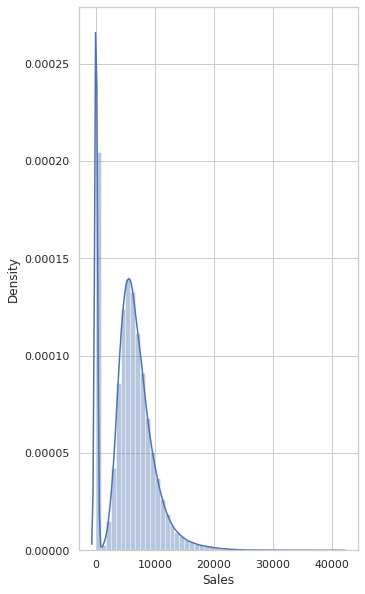

In [14]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["Sales"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


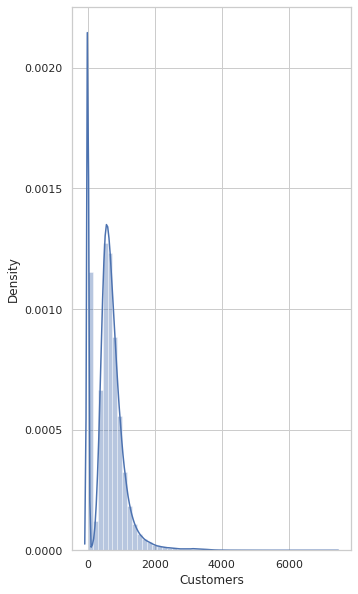

In [15]:
#Find the range of the data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["Customers"])

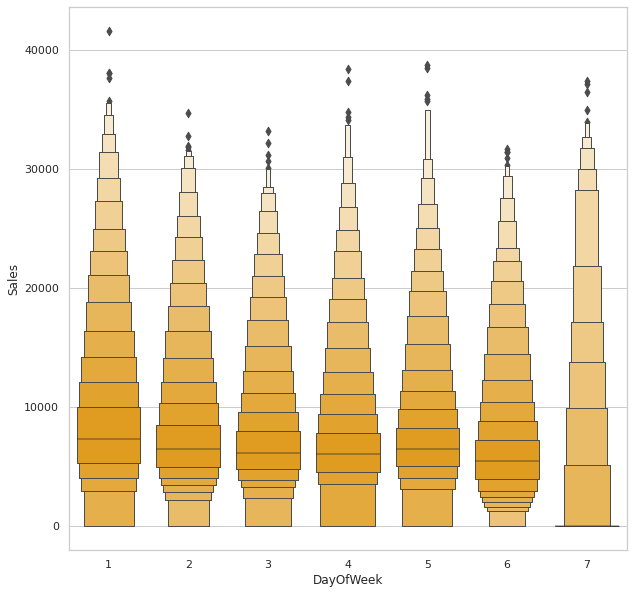

In [16]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=df,scale="linear",x="DayOfWeek",y="Sales",color="orange")

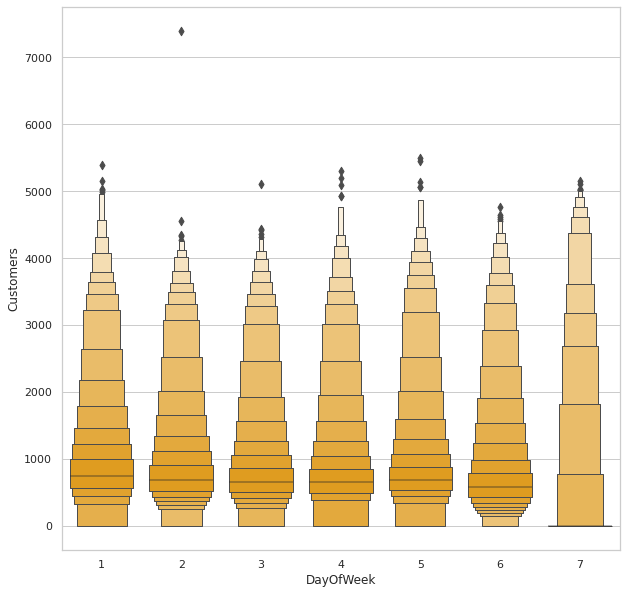

In [17]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=df, scale="linear",color="orange")

This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo.
However I will cap off, the Customers at 3000, and Sales at 20,000.

In [18]:
df["Sales"]=df["Sales"].apply(lambda x: 20000 if x>20000 else x)
df["Customers"]=df["Customers"].apply(lambda y: 3000 if y>3000 else y)
print(max(df["Sales"]))
print(max(df["Customers"]))

20000
3000


# Working With 'TIME'

In [19]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Week"]=df["Date"].dt.week%4
df["Season"] = np.where(df["Month"].isin([3,4]),"Spring",np.where(df["Month"].isin([5,6,7,8]), "Summer",np.where(df["Month"].isin ([9,10,11]),"Fall",np.where(df["Month"].isin ([12,1,2]),"Winter","None"))))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season
0,1,c,a,1270.0,9,2008,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,Summer
1,1,c,a,1270.0,9,2008,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,3,Summer
2,1,c,a,1270.0,9,2008,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,3,Summer
3,1,c,a,1270.0,9,2008,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,3,Summer
4,1,c,a,1270.0,9,2008,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,3,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,1,2013,1,6,2013-01-05,4771,339,1,0,0,1,2013,1,5,1,Winter
1017205,1115,d,c,5350.0,1,2013,1,5,2013-01-04,4540,326,1,0,0,1,2013,1,4,1,Winter
1017206,1115,d,c,5350.0,1,2013,1,4,2013-01-03,4297,300,1,0,0,1,2013,1,3,1,Winter
1017207,1115,d,c,5350.0,1,2013,1,3,2013-01-02,3697,305,1,0,0,1,2013,1,2,1,Winter


Adding an additional feature, that records the no. of Holidays per week.

In [20]:
Holiday_Year_Month_Week_df=pd.DataFrame({"Holiday per week":df["SchoolHoliday"],"Week":df["Week"],"Month":df["Month"],"Year":df["Year"],"Date":df["Date"]})
Holiday_Year_Month_Week_df=Holiday_Year_Month_Week_df.drop_duplicates(subset=['Date'])
Holiday_Year_Month_Week_df=Holiday_Year_Month_Week_df.groupby(["Year","Month","Week"]).sum()
Holiday_Year_Month_Week_df

Holiday per week
Year Month Week                  
2013 1     0                    0
           1                    6
           2                    5
           3                    0
     2     0                    0
...                           ...
2015 6     3                    0
     7     0                    0
           1                    0
           2                    0
           3                    5

[124 rows x 1 columns]

In [21]:
df=df.merge(Holiday_Year_Month_Week_df, on=["Year","Month","Week"],how="inner")

Adding additional features, that records the avg. no. of Customers per month and avg. no. of Customers per week

In [22]:
customer_time_df=pd.DataFrame({"Avg CustomersPerMonth":df["Customers"],"Month":df["Month"]})
AvgCustomerperMonth=customer_time_df.groupby("Month").mean()
AvgCustomerperMonth

,Avg CustomersPerMonth
Month,
1,600.872808
2,625.500000
3,628.030088
4,628.665959
5,599.796268
6,622.774499
7,654.703236
8,640.718253
9,633.189317


In [23]:
customer_time_df=pd.DataFrame({"Avg CustomersPerWeek":df["Customers"],"Week":df["Week"],"Year":df["Year"],"Month":df["Month"]})
AvgCustomerperWeek=customer_time_df.groupby(["Year","Month","Week"]).mean()
AvgCustomerperWeek

Avg CustomersPerWeek
Year Month Week                      
2013 1     0               629.859577
           1               539.328011
           2               668.746829
           3               538.288533
     2     0               648.614862
...                               ...
2015 6     3               716.866069
     7     0               598.104420
           1               670.248174
           2               572.498655
           3               701.697758

[124 rows x 1 columns]

In [24]:
df=df.merge(AvgCustomerperMonth,on="Month",how="inner")
df=df.merge(AvgCustomerperWeek,on=["Year","Month","Week"],how="inner")

adding an additional feature that records the no. of promo per week

In [25]:
promo_time_df=pd.DataFrame({"PromoCountperWeek":df["Promo"],"Year":df["Year"],"Month":df["Month"],"Week":df["Week"],"Date":df["Date"]})
promo_time_df=promo_time_df.drop_duplicates(subset=['Date'])
promo_time_df=promo_time_df.groupby(["Year","Month","Week"]).sum()
promo_time_df

PromoCountperWeek
Year Month Week                   
2013 1     0                     5
           1                     0
           2                     5
           3                     0
     2     0                     5
...                            ...
2015 6     3                     7
     7     0                     0
           1                     5
           2                     0
           3                     8

[124 rows x 1 columns]

In [26]:
df=df.merge(promo_time_df,on=["Year","Month","Week"], how="inner")

combining 'CompetitionSinceMonth' & 'CompetitionSinceYear' into 'CompetitionSince'

In [27]:
df=df.rename(columns={'CompetitionOpenSinceYear': 'year','CompetitionOpenSinceMonth':'month'})
df['CompetitionOpenSince'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df=df.rename(columns={ 'year':'CompetitionOpenSinceYear','month':'CompetitionOpenSinceMonth'})

# Handling Categorical Data

The columns StoreType, Assortment, Season have char type or String type values, all of this need to converted to a numerical value

In [28]:
numerical_data_col=["Store","Competition Distance","Promo2","DayOfWeek","Sales","Customers","Open","SchoolHoliday","Year","Month","Day","Week"]
categorical_data_col=["StoreType","Assortment","Season"]

In [29]:
for i in categorical_data_col:
    p=0
    for j in df[i].unique():
        df[i]=np.where(df[i]==j,p,df[i])
        p=p+1

    df[i]=df[i].astype(int)

In [30]:
#The column StateHoliday contains 0,'0',a and b. This needs to be conerted to a pure numerical data column
df["StateHoliday"].unique()

array(['0', 0, 'a', 'b', 'c'], dtype=object)

In [31]:
df["StateHoliday"]=np.where(df["StateHoliday"] == '0' ,0,1)
df["StateHoliday"]=df["StateHoliday"].astype(int)

# EDA

## Are the promos effective?

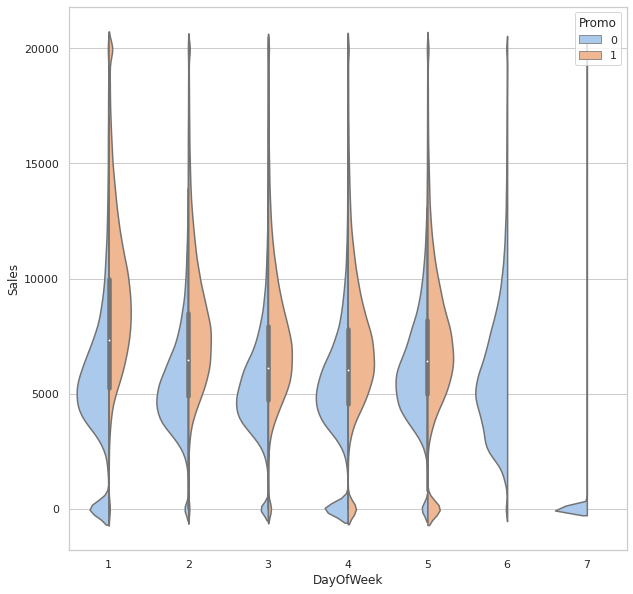

In [32]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Sales",hue="Promo",split=True, data=df)

The days promos were present have indeed shown a slight improvement in Sales.
The plot above also shows that there was no promo offered on 6th and the 7th day of the week (Saturday and Sunday), and stores didn't suffer for doing so either, as it can be seen the no. of customers on the weekends, were more that that during the weekdays.

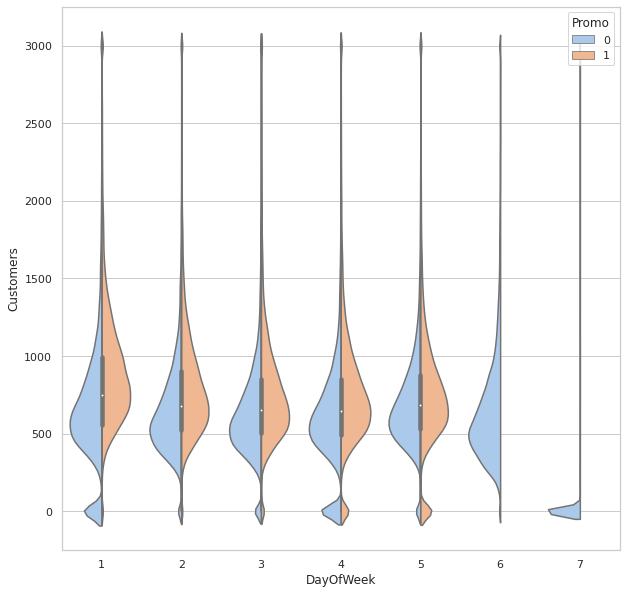

In [33]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Customers",hue="Promo",split=True, data=df)

## Does competition distance matter?

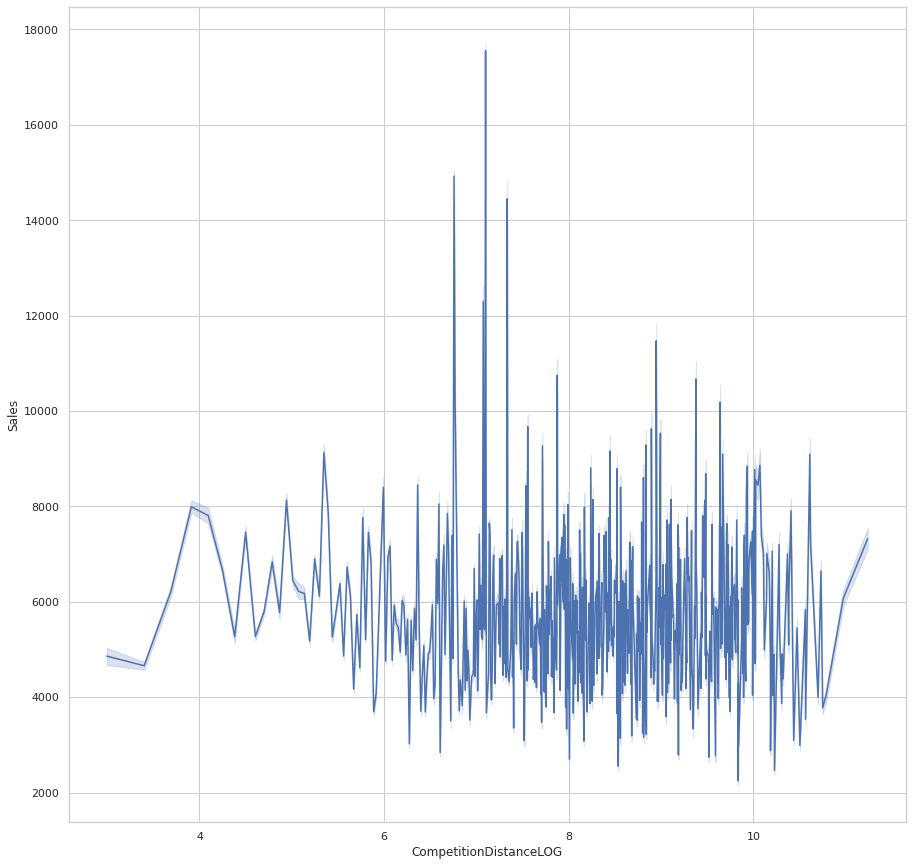

In [34]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
df["CompetitionDistanceLOG"]=np.log(df["CompetitionDistance"])
sns.lineplot(x="CompetitionDistanceLOG", y="Sales", data=df)

Competition Distance does seem to affect Sales. The stores with less CompetitionDistance didn't make more Sales.

## Is there a surge of customers during SchoolHolidays?

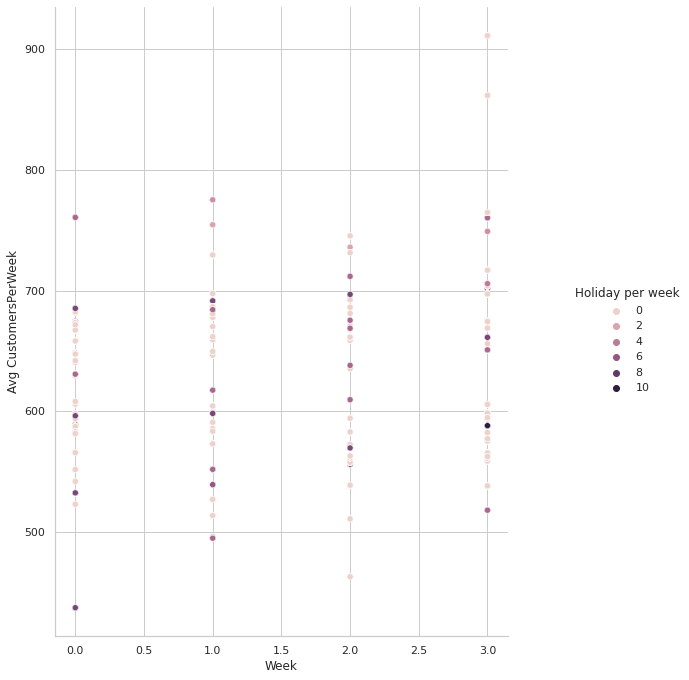

In [35]:
sns.set(style="whitegrid")
g=sns.relplot(y="Avg CustomersPerWeek", x="Week", hue="Holiday per week", data=df)
g.fig.set_size_inches(10,10)

It doesn't look like there is a big difference in the no. of customers even if there were 4 School Holidays that week

## Is there an increase in promo if it is a School Holiday?

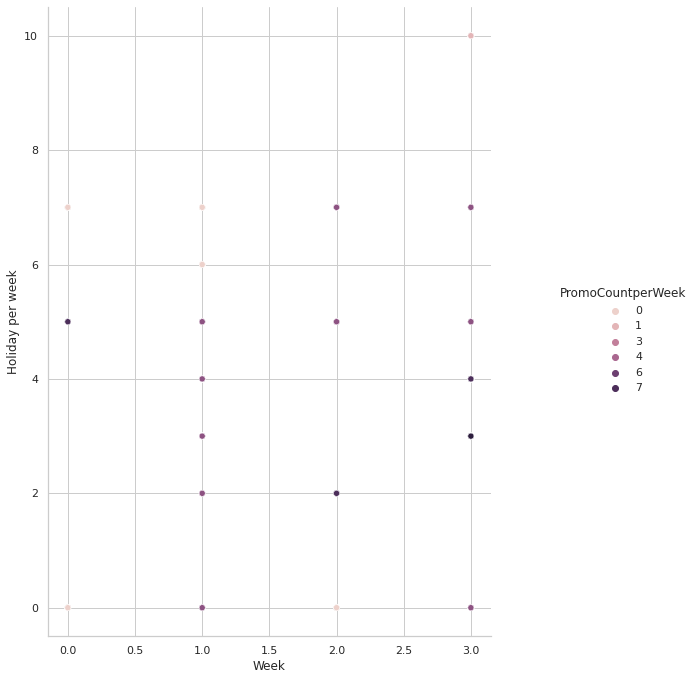

In [36]:
sns.set(style="whitegrid")
g=sns.relplot(y="Holiday per week", x="Week", hue="PromoCountperWeek", data=df)
g.fig.set_size_inches(10,10)

It doesn't seem like the Holidays had any effect on promo and Customers.

# Feature Engineering

## Finding location of stores

In [37]:
#using public state holidays data from https://www.timeanddate.com/holidays/germany/2013
holid=df.loc[df.StateHoliday=='a']
bydate=df.groupby('Date')['Store'].count()
#number of stores celebrating holidays
bydate.head()

Date
2013-01-01    1114
2013-01-02    1115
2013-01-03    1115
2013-01-04    1115
2013-01-05    1115
Name: Store, dtype: int64

In [38]:
#Figuring out store locations based on state holidays
SN = holid.loc[holid.Date == '2013-11-20','Store'].values
print('{} stores located in Saxony.'.format(SN.shape[0]))
BW_BY_ST = holid.loc[holid.Date == '2013-01-06','Store'].values
print('{} stores located in BW, BY, ST.'.format(BW_BY_ST.shape[0]))
BW_BY_HE_NW_RP_SL = holid.loc[holid.Date == '2013-05-30','Store'].values
print('{} stores located in BW, BY, HE, NW, RP, SL.'.format(BW_BY_HE_NW_RP_SL.shape[0]))
BY_SL = holid.loc[holid.Date =='2013-08-15','Store'].values
print('{} stores located in BY,SL.'.format(BY_SL.shape[0]))
BB_MV_SN_ST_TH = holid.loc[holid.Date =='2013-10-31','Store'].values
print('{} stores located in BB, MV, SN, ST, TH.'.format(BB_MV_SN_ST_TH.shape[0]))
BW_BY_NW_RP_SL = holid.loc[holid.Date =='2013-11-01','Store'].values
print('{} stores located in BW, BY, NW, RP, SL.'.format(BW_BY_NW_RP_SL.shape[0]))
BW_BY = np.intersect1d(BW_BY_ST, BW_BY_HE_NW_RP_SL)
print('{} stores located in BW, BY.'.format(BW_BY.shape[0]))

0 stores located in Saxony.
0 stores located in BW, BY, ST.
0 stores located in BW, BY, HE, NW, RP, SL.
0 stores located in BY,SL.
0 stores located in BB, MV, SN, ST, TH.
0 stores located in BW, BY, NW, RP, SL.
0 stores located in BW, BY.


In [39]:
ST = np.setxor1d(BW_BY_ST, BW_BY)
print('{} stores located in ST.'.format(ST.shape[0]))
BY = np.intersect1d(BW_BY, BY_SL)
print('{} stores located in BY.'.format(BY.shape[0]))
SL = np.setxor1d(BY, BY_SL)
print('{} stores located in SL.'.format(SL.shape[0]))
BW = np.setxor1d(BW_BY, BY)
print('{} stores located in BW.'.format(BW.shape[0]))
HE = np.setxor1d(BW_BY_HE_NW_RP_SL,BW_BY_NW_RP_SL)
print('{} stores located in HE.'.format(HE.shape[0]))
BB_MV_TH = np.setxor1d(np.setxor1d(BB_MV_SN_ST_TH,SN),ST)
print('{} stores located in BB, MV, TH.'.format(BB_MV_TH.shape[0]))
NW_RP = np.setxor1d(BW_BY_NW_RP_SL,BW_BY) # SL has 0 stores
print('{} stores located in NW, RP.'.format(NW_RP.shape[0]))
allstores = np.unique(df.Store.values)
BE_HB_HH_NI_SH = np.setxor1d(np.setxor1d(allstores,BW_BY_HE_NW_RP_SL),BB_MV_SN_ST_TH)
print('{} stores located in BE, HB, HH, NI, SH.'.format(BE_HB_HH_NI_SH.shape[0]))

0 stores located in ST.
0 stores located in BY.
0 stores located in SL.
0 stores located in BW.
0 stores located in HE.
0 stores located in BB, MV, TH.
0 stores located in NW, RP.
1115 stores located in BE, HB, HH, NI, SH.


In [40]:
#using public school holidays data from http://www.holidays-info.com/School-Holidays-Germany/2015/school-holidays_2015.html.
#furthur division based on school holidays 
df.loc[df.Store.isin(NW_RP)].groupby('Date')['SchoolHoliday'].sum().value_counts()
RP = df.loc[df.Date=='2015-03-26'].loc[df.Store.isin(NW_RP)].loc[df.SchoolHoliday==1,'Store'].values
NW = np.setxor1d(NW_RP,RP)
print('{} stores located in RP.'.format(RP.shape[0]))
print('{} stores located in NW.'.format(NW.shape[0]))
df.loc[df.Store.isin(BB_MV_TH)].groupby('Date')['SchoolHoliday'].sum().value_counts()
TH = BB_MV_TH
print('{} stores located in TH.'.format(TH.shape[0]))
HH = df.loc[df.Date=='2015-03-02'].loc[df.Store.isin(BE_HB_HH_NI_SH)].loc[df.SchoolHoliday==1,'Store'].values
print('{} stores located in HH.'.format(HH.shape[0]))
BE_HB_NI_SH = np.setxor1d(BE_HB_HH_NI_SH,HH)
SH = df.loc[df.Date=='2015-04-17'].loc[df.Store.isin(BE_HB_NI_SH)].loc[df.SchoolHoliday==1,'Store'].values
print('{} stores located in SH.'.format(SH.shape[0]))
BE_HB_NI = np.setxor1d(BE_HB_NI_SH,SH)
BE = df.loc[df.Date=='2015-03-25'].loc[df.Store.isin(BE_HB_NI)].loc[df.SchoolHoliday==0,'Store'].values
print('{} stores located in BE.'.format(BE.shape[0]))
HB_NI = np.setxor1d(BE_HB_NI,BE)

0 stores located in RP.
0 stores located in NW.
0 stores located in TH.
28 stores located in HH.
115 stores located in SH.
950 stores located in BE.


In [41]:
states = pd.Series('',index = allstores,name='State')
states.loc[BW] = 'BW'
states.loc[BY] = 'BY'
states.loc[BE] = 'BE'
states.loc[HB_NI] = 'HB,NI'
states.loc[HH] = 'HH'
states.loc[HE] = 'HE'
states.loc[NW] = 'NW'
states.loc[RP] = 'RP'
states.loc[SN] = 'SN'
states.loc[ST] = 'ST'
states.loc[SH] = 'SH'
states.loc[TH] = 'TH'
states[states!=''].value_counts().sum()
states.to_csv('location.csv', header=True, index_label='Store')

In [42]:
location_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/rossmann-store-sales/location.csv',index_col="Store")
location_df.head()

,State
Store,
1,HE
2,TH
3,NW
4,BE
5,SN


In [43]:
df=df.merge(location_df,on='Store',how="inner")

## Adding weather data

In [44]:
weather_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/rossmann-store-sales/weather.csv")

In [45]:
weather_df.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,State
0,01-01-2013,8,6,4,7,6,2,100,90,77,1008,1001,998,31.0,11.0,6.0,29,23,NaN,6.10,6.0,Rain,235,HB
1,02-01-2013,7,5,3,5,4,3,93,88,81,1023,1017,1008,31.0,14.0,9.0,27,21,NaN,0.51,6.0,Rain,244,HB
2,03-01-2013,11,8,6,9,8,5,100,93,88,1030,1024,1020,26.0,9.0,3.0,32,23,NaN,1.02,6.0,Rain,260,HB
3,04-01-2013,10,8,7,9,8,6,100,92,87,1031,1029,1028,31.0,9.0,3.0,35,24,NaN,0.00,7.0,Rain,277,HB
4,05-01-2013,8,7,7,7,7,6,100,92,87,1031,1030,1028,14.0,8.0,4.0,29,23,NaN,0.00,8.0,Rain,293,HB


In [46]:
weather_df.describe()

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,WindDirDegrees
count,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15459.000000,15459.000000,15459.000000,15840.000000,15840.000000,3604.000000,15840.000000,14667.000000,15840.000000
mean,14.644129,10.388952,6.198990,8.587816,6.205808,3.626136,93.659596,74.282891,50.158586,1018.532197,1015.299747,1012.307955,24.057572,12.239796,7.025163,22.766604,11.972222,48.864317,0.831718,5.551306,175.896717
std,8.646012,7.379260,6.526391,6.244780,6.086768,6.128390,7.678530,13.486552,19.960216,7.788720,8.123311,8.600585,8.976799,5.067944,4.980602,8.988618,5.872844,13.026954,2.513506,1.687710,101.588872
min,-11.000000,-13.000000,-15.000000,-14.000000,-15.000000,-73.000000,44.000000,30.000000,4.000000,976.000000,974.000000,970.000000,0.000000,0.000000,0.000000,3.000000,2.000000,21.000000,0.000000,0.000000,-1.000000
25%,8.000000,4.000000,1.000000,4.000000,2.000000,-1.000000,90.750000,65.000000,34.000000,1014.000000,1010.000000,1007.000000,14.000000,10.000000,3.000000,16.000000,8.000000,39.000000,0.000000,5.000000,80.000000
50%,15.000000,11.000000,7.000000,9.000000,7.000000,4.000000,94.000000,76.000000,49.000000,1019.000000,1016.000000,1013.000000,31.000000,11.000000,7.000000,21.000000,11.000000,48.000000,0.000000,6.000000,202.000000
75%,21.000000,16.000000,11.000000,13.000000,11.000000,8.000000,100.000000,85.000000,66.000000,1024.000000,1021.000000,1018.000000,31.000000,14.000000,10.000000,27.000000,14.000000,55.000000,0.250000,7.000000,256.000000
max,39.000000,31.000000,24.000000,25.000000,20.000000,19.000000,100.000000,100.000000,100.000000,1043.000000,1040.000000,1038.000000,31.000000,31.000000,31.000000,101.000000,53.000000,111.000000,58.930000,8.000000,360.000000


In [47]:
weather_df.isna().sum()

Date                              0
Max_TemperatureC                  0
Mean_TemperatureC                 0
Min_TemperatureC                  0
Dew_PointC                        0
MeanDew_PointC                    0
Min_DewpointC                     0
Max_Humidity                      0
Mean_Humidity                     0
Min_Humidity                      0
Max_Sea_Level_PressurehPa         0
Mean_Sea_Level_PressurehPa        0
Min_Sea_Level_PressurehPa         0
Max_VisibilityKm                381
Mean_VisibilityKm               381
Min_VisibilitykM                381
Max_Wind_SpeedKm_h                0
Mean_Wind_SpeedKm_h               0
Max_Gust_SpeedKm_h            12236
Precipitationmm                   0
CloudCover                     1173
Events                         3951
WindDirDegrees                    0
State                             0
dtype: int64

In [48]:
weather_df=weather_df.bfill()
weather_df=weather_df.ffill()

In [49]:
weather_df.Date=pd.to_datetime(weather_df.Date)

In [50]:
df.to_csv('cleaned_weather.csv') 

In [51]:
df= df.merge(weather_df, how='inner', left_on=["Date", "State"], right_on=["Date","State"])

In [52]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/data/rossmann-store-sales/final_RossmannSales.csv') 

# Final Check

In [53]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season,Holiday per week,Avg CustomersPerMonth,Avg CustomersPerWeek,PromoCountperWeek,CompetitionOpenSince,CompetitionDistanceLOG,State,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1,0,0,1270.0,9,2008,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2008-09-01,7.146772,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,Fog,13
1,56,2,1,6620.0,3,2012,1,5,2015-07-31,10022,619,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2012-03-01,8.797851,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,Fog,13
2,69,0,1,1130.0,1,2013,1,5,2015-07-31,11204,1371,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2013-01-01,7.029973,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,Fog,13
3,77,2,1,1090.0,8,2009,1,5,2015-07-31,10335,780,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2009-08-01,6.993933,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,Fog,13
4,111,2,1,7890.0,1,2013,1,5,2015-07-31,8897,698,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2013-01-01,8.973351,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,Fog,13


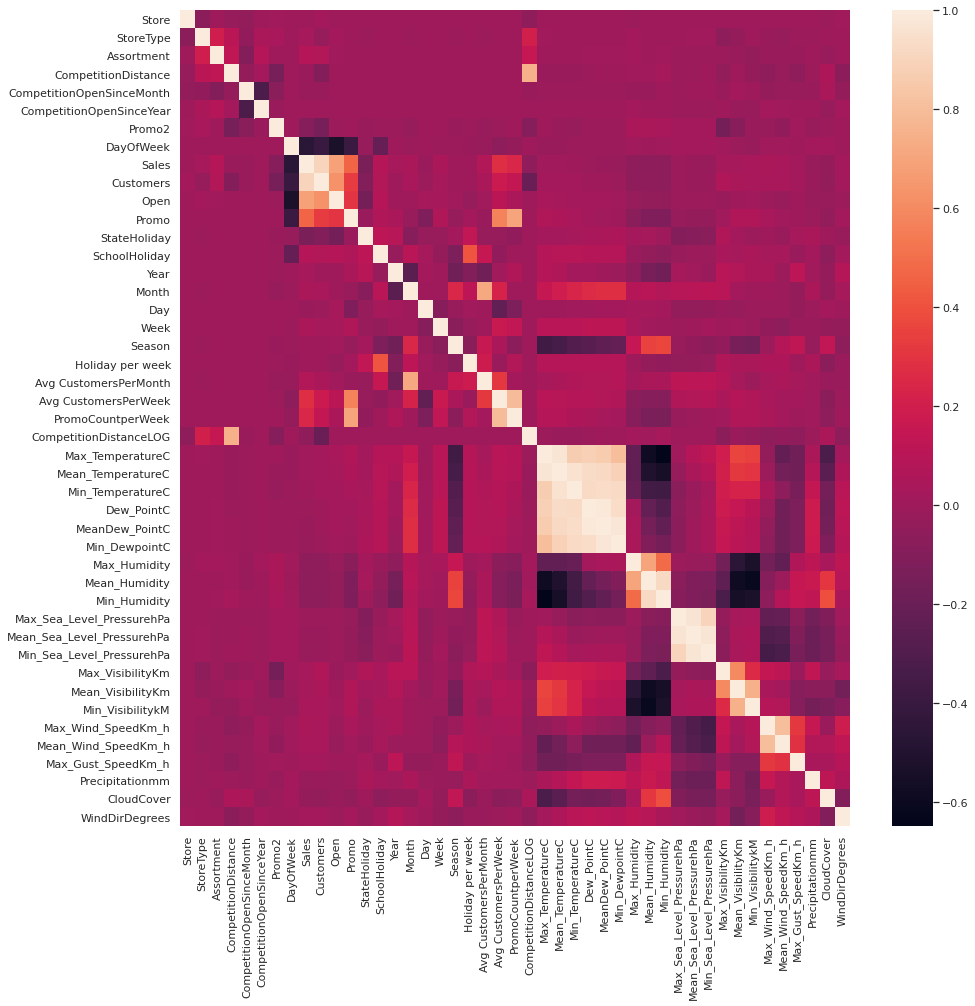

In [55]:
#Find Correlation between the data columns
plt.figure(figsize=(15,15))
sns.heatmap((df.corr()))

the heatmap shows all our hypothesis were true, there is very little correlation between School Holiday, Customers and Promo, but there is a strong correlation between Promo and Sales